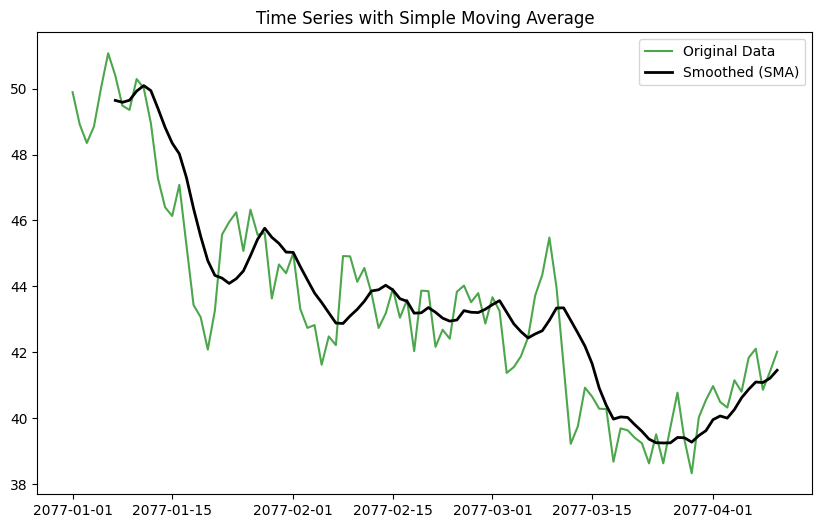

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample time series data (e.g., daily sales, temperature, etc.)
dates = pd.date_range(start='2077-01-01', periods=100, freq='D')

data = np.random.randn(100).cumsum() + 50  # Some random data with a trend

# Create a DataFrame
df = pd.DataFrame(data, index=dates, columns=['Value'])

# Simple Moving Average (SMA)
window_size = 7  # 7-day moving average
df['SMA'] = df['Value'].rolling(window=window_size).mean()

# Plotting the original data and the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data', color='green', alpha=0.7)
plt.plot(df.index, df['SMA'], label='Smoothed (SMA)', color='black', linewidth=2)
plt.title('Time Series with Simple Moving Average')
plt.legend()
plt.show()


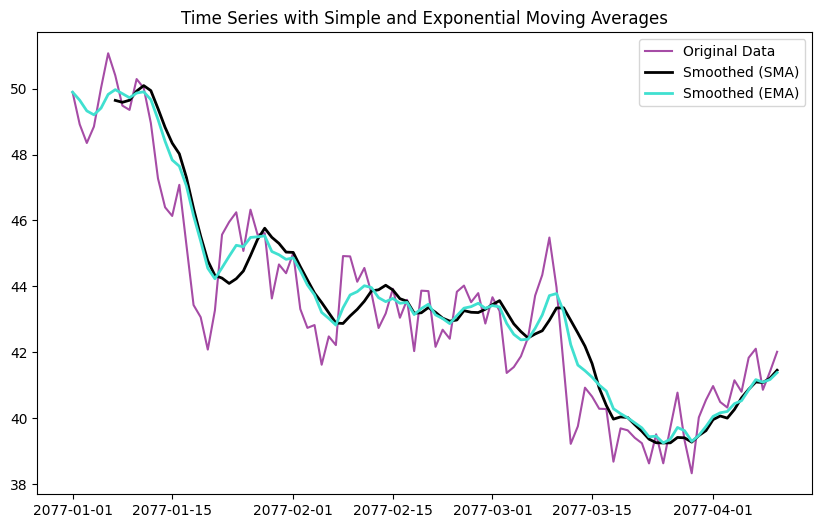

In [6]:
# Exponential Moving Average (EMA)
df['EMA'] = df['Value'].ewm(span=7, adjust=False).mean()

# Plotting the original data and the smoothed data (SMA and EMA)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data', color='purple', alpha=0.7)
plt.plot(df.index, df['SMA'], label='Smoothed (SMA)', color='black', linewidth=2)
plt.plot(df.index, df['EMA'], label='Smoothed (EMA)', color='Turquoise', linewidth=2)
plt.title('Time Series with Simple and Exponential Moving Averages')
plt.legend()
plt.show()


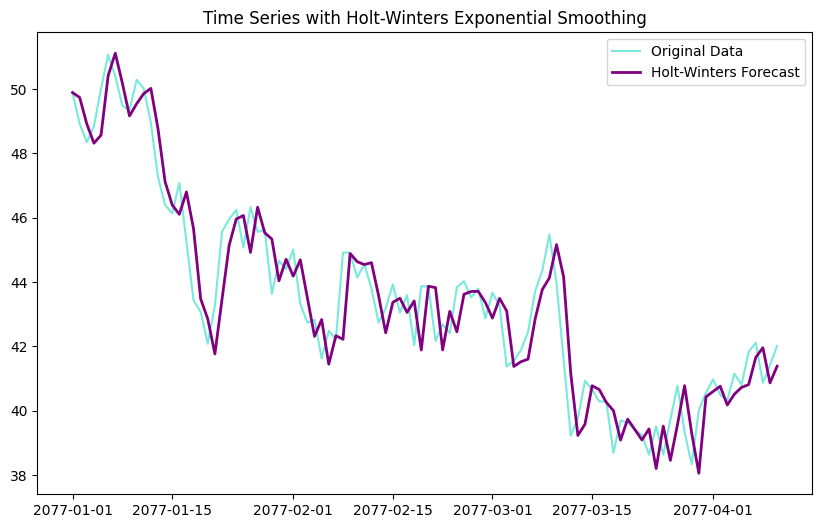

In [7]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model to the data
model = ExponentialSmoothing(df['Value'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit = model.fit()

# Forecasting future values (can be used to remove trend)
df['HW_Forecast'] = hw_fit.fittedvalues

# Plotting the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data', color='turquoise', alpha=0.7)
plt.plot(df.index, df['HW_Forecast'], label='Holt-Winters Forecast', color='purple', linewidth=2)
plt.title('Time Series with Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()


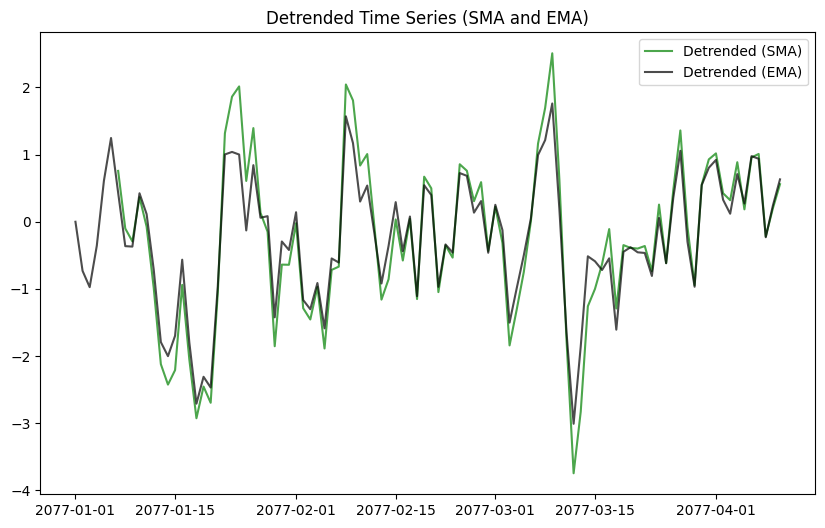

In [8]:
# Detrending using the simple moving average (SMA)
df['Detrended_SMA'] = df['Value'] - df['SMA']

# Detrending using the exponential moving average (EMA)
df['Detrended_EMA'] = df['Value'] - df['EMA']

# Plotting the detrended data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Detrended_SMA'], label='Detrended (SMA)', color='green', alpha=0.7)
plt.plot(df.index, df['Detrended_EMA'], label='Detrended (EMA)', color='black', alpha=0.7)
plt.title('Detrended Time Series (SMA and EMA)')
plt.legend()
plt.show()


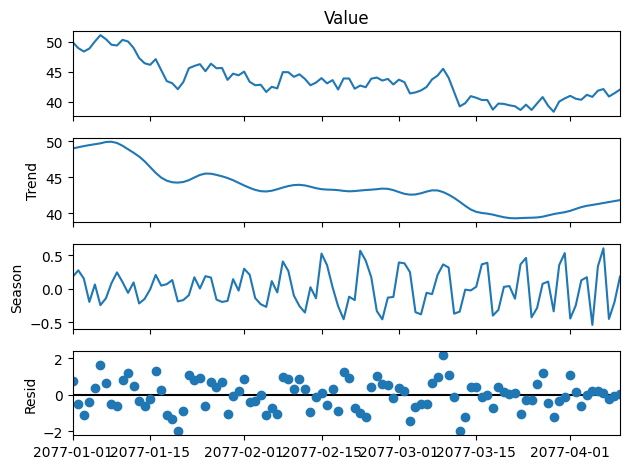

In [9]:
from statsmodels.tsa.seasonal import STL

# Seasonal Decomposition of Time Series
stl = STL(df['Value'], seasonal=13)  # 13-period seasonality
result = stl.fit()

# Plot the decomposition
result.plot()
plt.show()
